# Abstract
---
Airbnb is a popular platform when people are looking for short-term housings for travel or business. It is surprising that Airbnb publicly releases an enormous amount of data on its listings including detailed information on the location of the listings and the hosts, which raises privacy concerns. In this project, we focus on the Airbnb Boston dataset, discuss its ethical issues and predict listing qualities. For such an identifiable dataset, our first instinct was anonymization. But we were concerned that such procedures would affect the efficiency and accuracy of our analysis. So after data cleaning and model selection, we fit a Random Forest model to both the 3-anonymous and the original cleaned dataset, and compare their performance. The result was quite interesting. The Random Forest model took exact locations, such as Longitude as an important feature, but discarded the rather general location info, such as Neighborhood. And the model actually performed much better on the anonymized data. Thus we conclude that, anonymization, as shown in our example, can not only help protect privacy, but also remove noise in the datset, relieve the overfitting problem and help the model achieve a better performance.

# Content
---
### 1. [Data Introduction](#1) 
### 2. [Ethical Issues](#2)
### 3. [Data Cleaning](#3)
### 4. [Modeling & Analysis without anonymization](#4)
### 5. [Anonymization](#5)
### 6. [Results](#6)
### 7. [Conclusion](#7)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from collections import defaultdict
from itertools import chain
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Data Introduction  <a id = "1"></a>

Data Source: http://insideairbnb.com/get-the-data.html

In [3]:
bos_listing = pd.read_csv('listings_bos.csv')

In [4]:
bos_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200414051806,2020-04-14,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a few hours,100%,44%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,2 months ago,t,11,20,20,97,2020-04-14,16,1,2015-07-10,2019-12-21,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.28
1,5506,https://www.airbnb.com/rooms/5506,20200414051806,2020-04-14,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...",none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache

In [5]:
bos_listing.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## Ethical Issues <a id = "2" Ethical Issues></a>

<img src="airbnb_map.png" width="600">

The picture above is taken from one of the Airbnb listing page. It's very general and only gives a broad information about the neighborhood. Users won't be able to access its exact address unless they book the place, which protects hosts' privacy. However, such information can be obtained from the publically available dataset. 

In [6]:
bos_listing[['latitude', 'longitude', 'is_location_exact']].head()

,latitude,longitude,is_location_exact
0,42.36413,-71.02991,t
1,42.32981,-71.09559,t
2,42.32994,-71.09351,t
3,42.35919,-71.06265,t
4,42.35840,-71.06185,t


In [7]:
bos_listing['is_location_exact'].value_counts()

t    3639
f     206
Name: is_location_exact, dtype: int64

As shown above, we can get the locations from 'latitude' and 'longitude'. Although Airbnb claims that location information for listings are anonymized, some locations are exact, and even not, some buildings can still easily be identified. 

For example, we can identify exact location for the condo after searching its location in Google map:

<img src="bos_map.png" width="800">

Combining locations with other information such as host name, it's not hard to imagine Google will find the rest of the personal information easily. 

Sharing the links to the listings also seems problematic and unnecessary. As these links lead to comprehensive listing info, both host and guest privacy are in risk. These links make reviews a lot more accessible, both reviews for the listing from previous guests and reviews for guest stays from previous hosts. With that, their whereabouts can be identified easily. For example, I noticed one guest was in Downtown Boston every two month. This kind of information may help Airbnb advertise, but could be very dangerous for the guest if someone is planning a crime. Also, Airbnb makes these data available in order to show people how it's been used in cities around the world. I don't think including those links would be much of a help in that case. 

We'll perform anonymization according to the discussions above in the later sections. 

## Data cleaning <a id = "3"></a>

#### Missing data(NaNs)

First, some columns have no useful information, i.e. contain only NaNs, we'll remove them.

In [20]:
bos_cleaned = bos_listing.copy()
bos_cleaned.isna().sum().sort_values(ascending = False)[:50]

neighbourhood_group_cleansed    3845
medium_url                      3845
thumbnail_url                   3845
xl_picture_url                  3845
square_feet                     3737
monthly_price                   3596
weekly_price                    3591
access                          1637
license                         1542
transit                         1439
notes                           1287
interaction                     1256
host_about                      1255
neighborhood_overview           1066
house_rules                      990
security_deposit                 879
review_scores_checkin            842
review_scores_value              841
review_scores_location           841
review_scores_accuracy           841
review_scores_cleanliness        840
review_scores_communication      839
review_scores_rating             839
reviews_per_month                825
first_review                     825
last_review                      825
space                            699
h

In [21]:
bos_cleaned = bos_cleaned.drop(columns = ['medium_url', 'xl_picture_url', 'thumbnail_url'])

Next, we'll examine the columns with a lot of missing values.

In [22]:
bos_cleaned['jurisdiction_names'][bos_cleaned['jurisdiction_names'].notna()]

0       {"Massachusetts State"," Massachusetts State"}
1       {"Massachusetts State"," Massachusetts State"}
2       {"Massachusetts State"," Massachusetts State"}
3       {"Massachusetts State"," Massachusetts State"}
4       {"Massachusetts State"," Massachusetts State"}
                             ...                      
3840    {"Massachusetts State"," Massachusetts State"}
3841    {"Massachusetts State"," Massachusetts State"}
3842    {"Massachusetts State"," Massachusetts State"}
3843    {"Massachusetts State"," Massachusetts State"}
3844    {"Massachusetts State"," Massachusetts State"}
Name: jurisdiction_names, Length: 3842, dtype: object

The jurisdiction_names column has duplicate information with other columns, such as state. So we'll remove it.

In [23]:
bos_cleaned = bos_cleaned.drop(columns = ['jurisdiction_names'])

In [24]:
bos_cleaned['license'][bos_cleaned['license'].notna()]

1       Exempt: This listing is a unit that has contra...
2                                              STR-404620
9                Exempt: This listing is a hotel or motel
10                                             STR-410426
11               Exempt: This listing is a hotel or motel
                              ...                        
3815                                            LB-390690
3824                                           STR-398270
3828                                           STR-397969
3837                                           STR-401050
3838                                           STR-415697
Name: license, Length: 2303, dtype: object

Column license contains license info for listing. Adding licenses to their profiles shows that the hosts are serious about renting their places and their listings are more legitimate. This could be potentially useful in the analysis part. We'll convert this to a binary column indicating whether license numbers are included. 

In [25]:
bos_cleaned['license'][bos_cleaned['license'].notna()] = 1
bos_cleaned['license'] = bos_cleaned['license'].fillna(0)

The following columns will be coded as binary as well.

- Including 'monthly_price' and 'weekly_price' shows hosts encourge long-term stays. 
- For columns('host_identity_verified', 'host_has_profile_pic', 'host_is_superhost') that are already binary, we'll convert NaNs to 0 as well.

In [26]:
binary_col = ['monthly_price', 'weekly_price',
             'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost']
for col in binary_col:
    bos_cleaned[col][bos_cleaned[col].notna()] = 1
    bos_cleaned[col] = bos_cleaned[col].fillna(0)

We'll drop the square_feet column as there is too much missing information and we can't input it. 

In [27]:
bos_cleaned = bos_cleaned.drop(columns = 'square_feet')

In [28]:
bos_cleaned.isna().sum().sort_values(ascending = False)

neighbourhood_group_cleansed    3845
access                          1637
transit                         1439
notes                           1287
interaction                     1256
                                ... 
maximum_nights                     0
minimum_minimum_nights             0
maximum_minimum_nights             0
minimum_maximum_nights             0
id                                 0
Length: 101, dtype: int64

In [29]:
bos_cleaned.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.845000e+03,3.845000e+03,3.845000e+03,3845.0,3845.000000,3845.000000,3845.0,3845.0,0.0,3845.000000,...,3003.000000,3006.000000,3004.000000,3004.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3020.000000
mean,2.529089e+07,2.020041e+13,9.287827e+07,1.0,186.069961,186.069961,1.0,1.0,NaN,42.337622,...,9.725608,9.650366,9.577563,9.236019,0.598960,31.626268,26.567490,4.978934,0.031209,1.827662
std,1.256313e+07,1.535356e+00,1.003461e+08,0.0,428.388936,428.388936,0.0,0.0,NaN,0.025206,...,0.786271,0.898054,0.785934,1.003434,0.490173,48.155154,47.831666,13.569696,0.380404,1.872423
min,3.781000e+03,2.020041e+13,4.804000e+03,1.0,0.000000,0.000000,1.0,1.0,NaN,42.235760,...,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.546315e+07,2.020041e+13,1.224305e+07,1.0,2.000000,2.000000,1.0,1.0,NaN,42.322550,...,10.000000,10.000000,9.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.400000
50%,2.557644e+07,2.020041e+13,4.193225e+07,1.0,7.000000,7.000000,1.0,1.0,NaN,42.344130,...,10.000000,10.000000,10.000000,9.000000,1.000000,6.000000,2.000000,0.000000,0.000000,1.220000
75%,3.688571e+07,2.020041e+13,1.632510e+08,1.0,46.000000,46.000000,1.0,1.0,NaN,42.353300,...,10.000000,10.000000,10.000000,10.000000,1.000000,42.000000,24.000000,4.000000,0.000000,2.700000
max,4.317636e+07,2.020041e+13,3.426938e+08,1.0,2324.000000,2324.000000,1.0,1.0,NaN,42.390950,...,10.000000,10.000000,10.000000,10.000000,1.000000,176.000000,176.000000,86.000000,5.000000,19.380000


Most of host_neighborhoods are identical to the neighborhoods of their listing, so we'll switch it to a binary column indicating whether the hosts are in the same neighborhoods as their listing. 

In [30]:
bos_cleaned['host_neighbourhood'] = bos_cleaned['host_neighbourhood'] == bos_cleaned['neighbourhood']

#### Columns that are too general that don't convey any useful information

The following columns only contain 1 value throughout the dataset, thus we'll remove them. 

In [31]:
gen_col = []
for col in bos_cleaned.columns:
    num = len(bos_cleaned[col].value_counts())
    if num <= 1:
        gen_col.append(col)
        print(col)
        print(bos_cleaned[col].value_counts())

scrape_id
20200414051806    3845
Name: scrape_id, dtype: int64
last_scraped
2020-04-14    3845
Name: last_scraped, dtype: int64
experiences_offered
none    3845
Name: experiences_offered, dtype: int64
host_is_superhost
1    3845
Name: host_is_superhost, dtype: int64
host_has_profile_pic
1    3845
Name: host_has_profile_pic, dtype: int64
host_identity_verified
1    3845
Name: host_identity_verified, dtype: int64
neighbourhood_group_cleansed
Series([], Name: neighbourhood_group_cleansed, dtype: int64)
market
Boston    3843
Name: market, dtype: int64
country_code
US    3845
Name: country_code, dtype: int64
country
United States    3845
Name: country, dtype: int64
has_availability
t    3845
Name: has_availability, dtype: int64
calendar_last_scraped
2020-04-14    3845
Name: calendar_last_scraped, dtype: int64
is_business_travel_ready
f    3845
Name: is_business_travel_ready, dtype: int64


In [32]:
bos_cleaned = bos_cleaned.drop(columns = gen_col)

## Modeling & Analysis (without anonymization) <a id = "4"></a>

#### Pre-processing 

In [33]:
bos_cleaned[['street', 'neighbourhood', 'neighbourhood_cleansed', 
                 'city', 'state', 'zipcode',
                'smart_location', 'latitude', 'longitude']].head()

,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude
0,"Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,"Boston, MA",42.36413,-71.02991
1,"Boston, MA, United States",Roxbury,Roxbury,Boston,MA,02119,"Boston, MA",42.32981,-71.09559
2,"Boston, MA, United States",Roxbury,Roxbury,Boston,MA,02119,"Boston, MA",42.32994,-71.09351
3,"Boston, MA, United States",Beacon Hill,Downtown,Boston,MA,02108,"Boston, MA",42.35919,-71.06265
4,"Boston, MA, United States",Beacon Hill,Downtown,Boston,MA,02108,"Boston, MA",42.35840,-71.06185


Some location columns contain only duplicated information with other coluns, we'll only keep 'neighbourhood', and the anonymized 'latitute' 'longitude', and remove the rest.

In [34]:
bos_df = bos_cleaned.copy()

In [35]:
loc_col = ['street', 'neighbourhood_cleansed', 
           'city', 'state', 'zipcode',  'smart_location', 'host_location']
bos_df = bos_df.drop(columns = loc_col)

Since we already have host_id, we don't need their names.

In [36]:
bos_df = bos_df.drop(columns = 'host_name')

Convert date columns to integers using the time interval between dates and date scraped.

In [37]:
bos_df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'neighbourhood',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'c

In [38]:
date_col = ['host_since', 'first_review', 'last_review']
day_now = pd.to_datetime(bos_listing['last_scraped'])
for col in date_col:
    day_then = pd.to_datetime(bos_df[col])
    bos_df[col] = (day_now - day_then).dt.days

In [39]:
def convert_days(s):
    if s == 'today':
        num = 0
    elif s == 'yesterday':
        num = 1
    elif s.endswith('days ago'):
        num = int(s.replace('days ago', ''))
    elif s.endswith('weeks ago'):
        num = int(s.replace('weeks ago', ''))*7
    elif s.endswith('months ago'):
        num = int(s.replace('months ago', '')) * 30
    else:
        num = 0
    return num

In [40]:
bos_df.calendar_updated = bos_df.calendar_updated.apply(convert_days)

Now we'll deal with text and categorical columns.

In [41]:
for col in bos_df.columns:
    if bos_df[col].dtype not in ['float64', 'int64', 'datetime64[ns]']:
        print(col + ': ', len(bos_df[col].value_counts()))

listing_url:  3845
name:  3682
summary:  2722
space:  2253
description:  3033
neighborhood_overview:  1502
notes:  1379
transit:  1580
access:  1492
interaction:  1405
house_rules:  1531
picture_url:  3721
host_url:  1331
host_about:  812
host_response_time:  4
host_response_rate:  35
host_acceptance_rate:  73
host_thumbnail_url:  1329
host_picture_url:  1329
host_neighbourhood:  2
host_verifications:  152
neighbourhood:  31
is_location_exact:  2
property_type:  21
room_type:  4
bed_type:  5
amenities:  2923
price:  345
security_deposit:  57
cleaning_fee:  119
extra_people:  42
requires_license:  2
instant_bookable:  2
cancellation_policy:  6
require_guest_profile_picture:  2
require_guest_phone_verification:  2


Convert numbers that are in string format to floats.

In [42]:
num_rate_col = ['host_response_rate', 'host_acceptance_rate']
num_fee_col = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [43]:
for col in num_rate_col:
    bos_df[col] = bos_df[col].fillna('0')
    bos_df[col] = bos_df[col].str.rstrip('%').astype(float)/100

In [44]:
for col in num_fee_col:
    bos_df[col] = bos_df[col].fillna('0')
    bos_df[col] = bos_df[col].str.strip('$,.').str.replace(',','').astype(float)

Binary columns will be converted to 0(False) and 1(True).

In [45]:
bos_df['host_neighbourhood'] = bos_df['host_neighbourhood'].astype(int)

In [46]:
bin_col = ['is_location_exact','requires_license','instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
for col in bin_col:
    bos_df[col] = bos_df[col].map({'f': 0, 't': 1})
    

Convert ordinal columns into integers.

In [47]:
# quickest replies have the highest ranking, we'll assume NaNs represent not replying at all
response_dict = {'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4}
bos_df['host_response_time'] = bos_df['host_response_time'].map(response_dict)
bos_df['host_response_time'] = bos_df['host_response_time'].fillna(0)


In [48]:
bos_df['cancellation_policy'].value_counts()

strict_14_with_grace_period    1935
moderate                        911
flexible                        839
strict                          116
super_strict_30                  36
super_strict_60                   8
Name: cancellation_policy, dtype: int64

In [49]:
# higher rankings are given to the more flexible 
cancel_dict = {'flexible': 6,
               'moderate': 5,
               'strict_14_with_grace_period': 4, 
               'strict': 3,
               'super_strict_60': 2,
               'super_strict_30': 1}
bos_df['cancellation_policy'] = bos_df['cancellation_policy'].map(cancel_dict)
bos_df['cancellation_policy'] = bos_df['cancellation_policy'].fillna(0)

In [50]:
bos_df['host_response_time'].value_counts()

4.0    2521
0.0     562
3.0     341
2.0     289
1.0     132
Name: host_response_time, dtype: int64

One-hot encode nominal columns.

In [51]:
print('Number of columns before one-hot encoding: ', bos_df.shape[1])

Number of columns before one-hot encoding:  80


In [52]:
nominal_col = ['neighbourhood', 'property_type', 'room_type', 'bed_type']
for col in nominal_col:
    if bos_df[col].isna().sum() != 0:
        drop_first = False
    else:
        drop_first = True
    bos_df = pd.concat([bos_df,pd.get_dummies(bos_df[col], drop_first = drop_first, dtype = float)],axis=1)  

In [53]:
bos_df = bos_df.drop(columns = nominal_col)

One final thing is that we need to remove urls and text columns for the random forest modeling below.

In [54]:
urls = ['picture_url', 'host_url', 'host_picture_url', 'host_thumbnail_url','listing_url']

bos_df = bos_df.drop(columns = urls)

In [55]:
texts = ['name','summary', 'space', 'description', 'neighborhood_overview', 'transit',
             'access', 'interaction', 'house_rules', 'host_about', 'notes', 'amenities',
             'host_verifications']
for col in texts:
    bos_df[col] = bos_df[col].str.len()
    bos_df[col] = bos_df[col].fillna(0)

In [56]:
bos_df.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,Townhouse,Villa,Hotel room,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,3781,25,244.0,822.0,1000.0,335.0,161.0,381.0,142.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5506,46,228.0,1000.0,1000.0,141.0,343.0,179.0,87.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6695,30,135.0,1000.0,1000.0,125.0,266.0,178.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8789,35,206.0,780.0,1000.0,196.0,604.0,369.0,35.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10730,30,229.0,507.0,1000.0,158.0,604.0,101.0,45.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Correlation

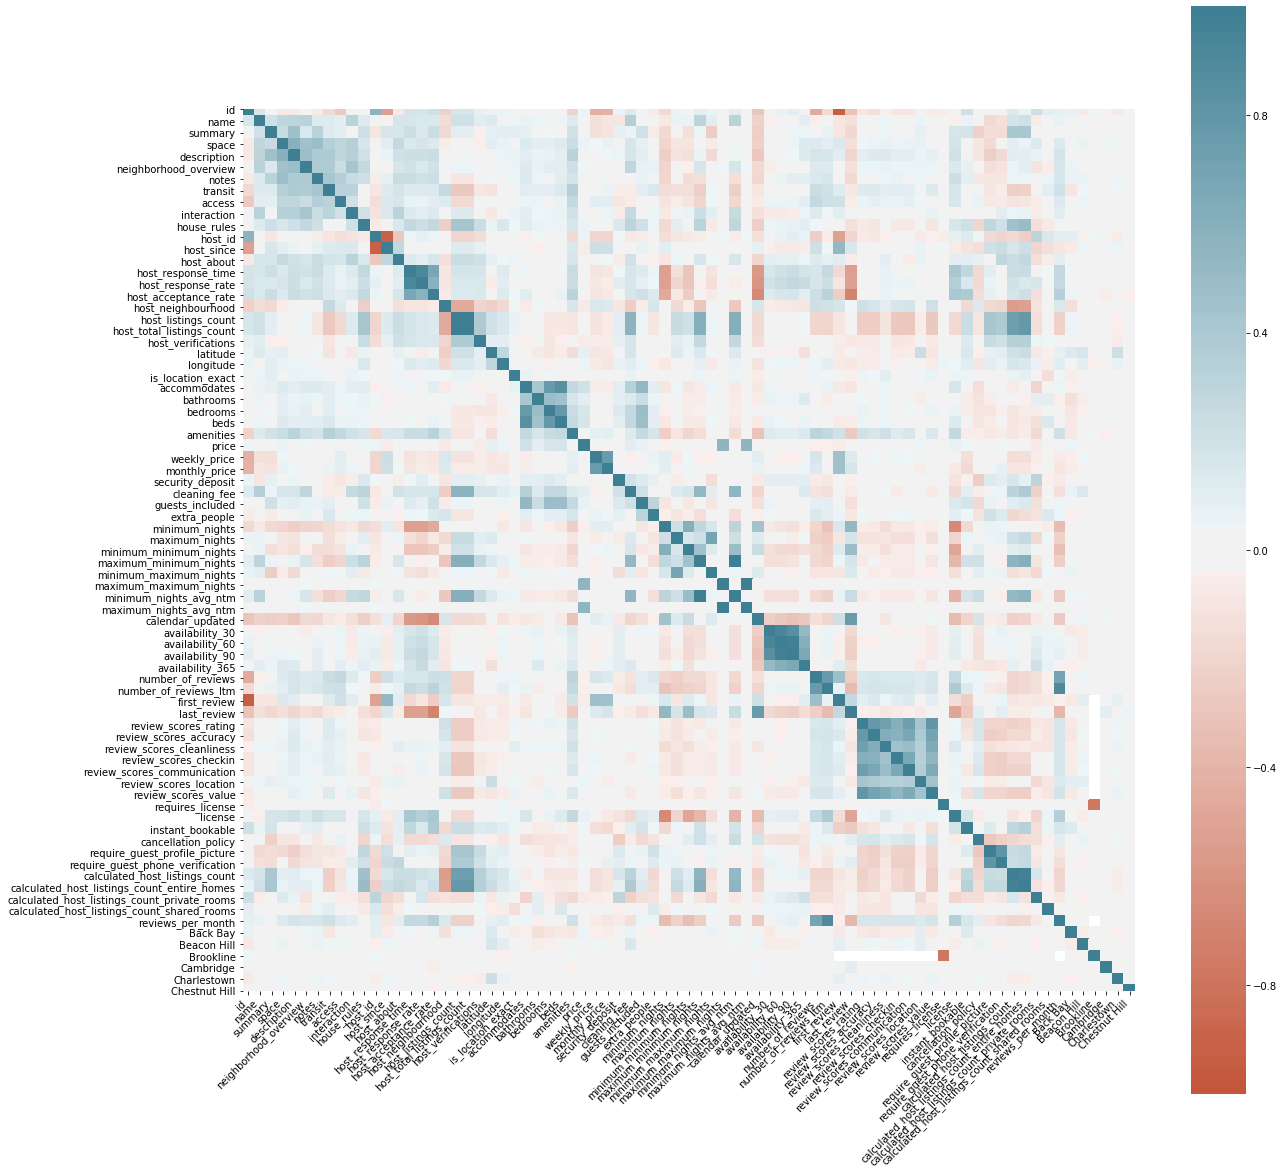

In [57]:
corr = bos_df.iloc[:, :77].corr()
plt.figure(figsize = (20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [58]:
avoid_repeat = []
for i in range(len(corr)):
    for j in range(len(corr)):
        if i != j and j not in avoid_repeat and (corr.iloc[i,j] >= 0.8 or corr.iloc[i,j] <= -0.8):
            avoid_repeat.append(i)
            print('{} and {} are correlated: {}'.format(corr.index[i], corr.columns[j], corr.iloc[i,j]))

id and first_review are correlated: -0.9305799160226008
host_id and host_since are correlated: -0.9111935117272777
host_response_time and host_response_rate are correlated: 0.9263611081753736
host_listings_count and host_total_listings_count are correlated: 1.0
accommodates and beds are correlated: 0.8531339651400713
maximum_minimum_nights and minimum_nights_avg_ntm are correlated: 0.9920756727410619
maximum_maximum_nights and maximum_nights_avg_ntm are correlated: 0.999999999999828
availability_30 and availability_60 are correlated: 0.9355960533027038
availability_30 and availability_90 are correlated: 0.8554422284662673
availability_60 and availability_90 are correlated: 0.9695378005808281
number_of_reviews_ltm and reviews_per_month are correlated: 0.905039167715924
require_guest_profile_picture and require_guest_phone_verification are correlated: 0.8112730634586262
calculated_host_listings_count and calculated_host_listings_count_entire_homes are correlated: 0.9599884252218649


Most of the highly correlated columns aren't suprising, such as host_listings_count and host_total_listings_count. But it's intersting to see availability_30 and availability_90 are less correlated than availability_30 and availability_60.

To avoid colinearity during modeling, we'll remove some of these columns. 

In [59]:
corr_col = [ 'host_total_listings_count',
            'minimum_minimum_nights', 'minimum_maximum_nights', 'minimum_nights_avg_ntm',
            'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes']

In [60]:
bos_df = bos_df.drop(columns = corr_col)

For the remaining columns that have NA values, we set them to be 0, since they are count data.

In [61]:
na_cols = ['review_scores_location',         
'review_scores_checkin',       
'review_scores_accuracy',
'review_scores_communication',
'review_scores_cleanliness',
'review_scores_rating',
'last_review',
'first_review',
'reviews_per_month',
'beds',
'bedrooms',
'bathrooms',
'host_since',
'host_listings_count']   
for c in na_cols:
    bos_df[c] = bos_df[c].fillna(0)

#### Modeling

First, we'll predict a listing's quality/popularity using its review scores.

In [62]:
# prepare the data
bos_df = bos_df[~bos_df['review_scores_value'].isna()]
X, y = bos_df.drop(columns = 'review_scores_value'), bos_df['review_scores_value']
y.value_counts()

10.0    1347
9.0     1279
8.0      264
7.0       57
6.0       27
2.0       16
4.0        9
5.0        4
3.0        1
Name: review_scores_value, dtype: int64

Say a good listing has a review score of 10, anything less than 10 count as not so good. The dataset is relatively balanced.

In [63]:
y = (y == 10).astype(int)

In [64]:
print('Proportion of good reviews: ', y.value_counts()[0]/len(y))
print('Proportion of not so good reviews: ', y.value_counts()[1]/len(y))

Proportion of good reviews:  0.5515978695073236
Proportion of not so good reviews:  0.4484021304926764


In [65]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We'll try different classification models and choose the one with the highest accuracy.

In [62]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
print('mse: ', mean_squared_error(svm.predict(X_test),y_test))

mse:  0.43760399334442596


In [63]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
print('mse: ', mean_squared_error(qda.predict(X_test),y_test))

mse:  0.39767054908485855


In [64]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print('mse: ', mean_squared_error(neigh.predict(X_test),y_test))

mse:  0.36605657237936773


In [65]:
# Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
prediction = list(rf.predict(X_test))
print('mse: ', mean_squared_error(prediction,y_test))

mse:  0.22129783693843594


Random Forest yield the best result:

In [122]:
prediction = list(rf.predict(X_test))
print('mse: ', mean_squared_error(prediction,y_test))
cm = confusion_matrix(y_test,prediction)
tn, fp, fn, tp = cm.ravel()
print(cm)

mse:  0.22628951747088186
[[280  58]
 [ 78 185]]


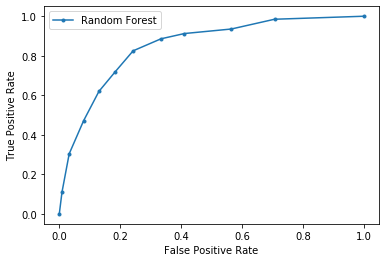

ROC-AUC score:  0.8493036650392602


In [69]:
proba = rf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, proba)
# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print('ROC-AUC score: ',rf_auc)

In [70]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: review_scores_rating Importance: 0.2
Variable: review_scores_accuracy Importance: 0.05
Variable: review_scores_communication Importance: 0.05
Variable: review_scores_cleanliness Importance: 0.04
Variable: longitude            Importance: 0.03
Variable: amenities            Importance: 0.03
Variable: number_of_reviews    Importance: 0.03
Variable: first_review         Importance: 0.03
Variable: id                   Importance: 0.02
Variable: summary              Importance: 0.02
Variable: space                Importance: 0.02
Variable: host_about           Importance: 0.02
Variable: host_listings_count  Importance: 0.02
Variable: latitude             Importance: 0.02
Variable: price                Importance: 0.02
Variable: cleaning_fee         Importance: 0.02
Variable: availability_365     Importance: 0.02
Variable: last_review          Importance: 0.02
Variable: calculated_host_listings_count Importance: 0.02
Variable: reviews_per_month    Importance: 0.02
Variable: name   

In [71]:
selected_columns = [name for (name,value) in feature_importances][:10]
selected_importances = [value for (name,value) in feature_importances][:10]

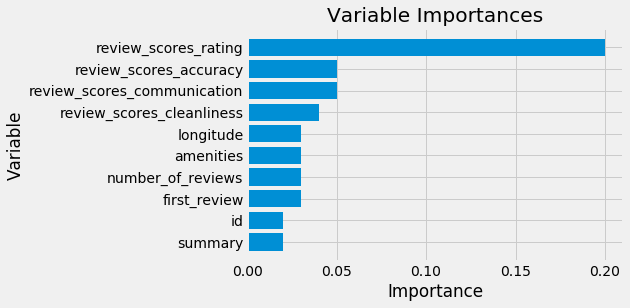

In [75]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
y_values = list(range(len(selected_columns)))
# Make a bar chart
plt.barh(y_values, selected_importances, orientation = 'horizontal')
plt.yticks(y_values, selected_columns, rotation='horizontal')
plt.gca().invert_yaxis()
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

## Anonymization  <a id = "5"></a>

In [76]:
bos_cleaned.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",https://a0.muscache.com/im/pictures/24670/b2de...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a few hours,100%,44%,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,True,5,5,"['email', 'phone', 'reviews']","Boston, MA, United States",East Boston,East Boston,Boston,MA,02128,"Boston, MA",42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$125.00,1,1,$0.00,$75.00,2,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,2 months ago,11,20,20,97,16,1,2015-07-10,2019-12-21,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,0,f,super_strict_30,f,f,1,1,0,0,0.28
1,5506,https://www.airbnb.com/rooms/5506,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...","Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,https://a0.muscache.com/im/pictures/1598e8b6-5...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,True,2,2,"['email', 'phone', 'reviews', 'kba']","Boston, MA, United States",Roxbury,Roxbury,Boston,MA,02119,"Boston, MA",42.32981,-71.09559,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$145.00,1,1,$0.00,$60.00,1,$0.00,3,730,3,5,1125,1125,3.0,1125.0,3 weeks ago,1,14,44,307,106,22,2009-03-21,2019-10-31,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1,t,strict_14_with_grace_period,f,f,6,6,0,0,0.79
2,6695,https://www.airbnb.com/rooms

In this section, we will apply generalization, and adding synthetic records on this cleaned dataset to achieve 3-anonymous. The direct identifiers for identifying a specific listing in this dataset are id, name, listing_url, host_id, latitude&longitude. Text descriptions can also be unique identifiers such as summary, description, neighborhood_overview, notes, transit, access, iteraction and house_rules. If the research focus on this dataset is not NLP-relevant, we consider them to be not important, and can simply remove them from the dataset. 

The quasi-identifiers that we considered are: host_name, host_since, host_location,  host_listings_count, neighbourhood, zipcode, city, price, number_of_reviews, first_review & last_review, review_scores_rating, minimum_nights, maximum_nights, availability_30/60/90/365. None of these attributes reveal the unique information about the host or the listing itself. But once combined internally or with outside data sources, it becomes feasible to identify a specific listing or host. Url attributes can also be considered as quasi-identifiers, picture_url', 'host_url', 'host_picture_url', 'host_thumbnail_url'. If people search them on Google, it could lead to dangerous situation if being abused. However, the important attributes of these urls have already been included in this dataset. For the simplicity of this project, we simply remove these columns. Thus we need to make the dataset 3-anonymous on the above quasi-identifiers to protect the privacy of the Airbnb users.

Plot of quasi-identifiers, grouped in colors:  
red: host relevant  
yellow: geographic information  
dark cyan: review relevant  
dark blue: booking availability   
![title](qs.png)

In [77]:
bos_anonymized = bos_cleaned.copy()

In [78]:
# First we remove unique identifiers and urls
unique_col = ['id', 'listing_url','host_id','name'] # latitude & longitude addressed below
urls = ['picture_url', 'host_url', 'host_picture_url', 'host_thumbnail_url']

bos_anonymized = bos_anonymized.drop(columns = unique_col)
bos_anonymized = bos_anonymized.drop(columns = urls)

In [79]:
bos_anonymized['is_location_exact'].value_counts()

t    3639
f     206
Name: is_location_exact, dtype: int64

As discussed in the Ethics section, including exact locations violates privacy, and since we'll anonymize the exact locations anyway, we'll remove this column.

In [80]:
bos_anonymized = bos_anonymized.drop(columns = 'is_location_exact')

For columns with (unique) descriptions, such as 'name' and 'description', we'll only take their lengths into account. We believe the lengths of these descriptions are correlated with the qualities of the listings, as hosts who provide detailed descriptions are likely to care about them more. Similarly, for 'amenities' and 'host_verifications', the more the merrir. So we'll include their length as well. 

In [81]:
texts = ['summary', 'space', 'description', 'neighborhood_overview', 'transit',
             'access', 'interaction', 'house_rules', 'host_about', 'notes', 'amenities',
             'host_verifications']
for col in texts:
    bos_anonymized[col] = bos_anonymized[col].str.len()
    bos_anonymized[col] = bos_anonymized[col].fillna(0)

As of exact locations(latitude, longitude), we'll add some random noise.

In [82]:
noise = np.random.normal(0, 1, size = len(bos_anonymized)) #standard normal

bos_anonymized['latitude'] = bos_anonymized['latitude'] + noise
bos_anonymized['longitude'] = bos_anonymized['longitude'] + noise

Now we want to convert this dataset to a 3-anonymous dataset.

In [83]:
qsi = ['host_name', 'host_since', 'host_location', 'host_listings_count',
      'street','neighbourhood', 
       'zipcode', 'city', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
       'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90',
       'availability_365']
qi = {} # qi is a dictionary where the key is the string concatenation of all the columns in a row, 
# and the value is a list of two objects: frequency of this string concatenation, and a list of indices where this concatenation appears
quasi_bos = bos_anonymized[qsi]
for i in range(len(quasi_bos)):
    string = str(list(quasi_bos.loc[i]))
    if string in qi:
        qi[string][0] = qi[string][0] + 1
        qi[string][1].append(i)
    else:
        qi[string] = [1,[i]]

In [84]:
k = 3
orig_k_3 = [v[1] for (key,v) in qi.items() if v[0] >= 3]
orig_k_3 = list(chain(*orig_k_3))
orig_k_3_df = bos_anonymized.loc[orig_k_3] #3-anonymous dataset
print(orig_k_3_df.shape)

(61, 79)


With suppresion, we have only 61 records left. Thus we decided to try generalization, blurring and adding synthetic records.
'Host_name' may not be a direct identifier, however, we think it is better to simply remove it due to privacy issues.

In [85]:
bos_anonymized = bos_anonymized.drop('host_name', axis= 1)

For datetime attributes such as 'host_since', 'first_review', 'last_review', we keep only the years.

In [86]:
time = ['host_since', 'first_review', 'last_review']
for col in time:
    list_time = pd.to_datetime(bos_anonymized[col])
    bos_anonymized[col] = [i.year for i in list_time]

For geographic attributes, some location columns contain only duplicated information with other coluns, we'll only keep 'city' since city is a more general attribute, and the anonymized 'latitute' 'longitude', and remove the rest. A more important reason that we keep city is that we would like to make this anonymization procedure generalizable to other, bigger Airbnb datasets as well, say the whole U.S. In that case, keeping the city variable can be beneficial. As you will see later in the modeling, we do not keep the city variable since it does not contain too much information for our research purpose. Note that previously we make an indicator variable host_neighborhood to suggest whether host_neighborhood is the same as neighbourhood. Here we will remove host_location for duplication and also privacy issue.

In [87]:
loc_col = ['street','neighbourhood', 'state', 'zipcode','host_location']
bos_anonymized = bos_anonymized.drop(columns = loc_col)

In [88]:
bos_anonymized ['city'] = [str(i).split(',')[0] for i in bos_anonymized ['city']]

For count variables such as 'price','host_listings_count','number_of_reviews','review_scores_rating', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90', 'availability_365' , we assign them to five different classes: very_low, low, average, high, and very_high according to their values.

In [89]:
bos_anonymized['price'] = bos_anonymized['price'].map(lambda x:float(x.replace(',', '').strip('$')))

In [90]:
def reassign(x,quantiles):
    low = quantiles[0]
    average = quantiles[1]
    high = quantiles[2]
    if x <= low:
        return 'low'
    elif low < x <= average:
        return 'average'
    else:
        return 'high'
def blurr(df,col,k=3):
    df[col] = df[col].fillna(0)
    quantiles = list(df[col].quantile([.3, .6, .9]))
    df[col] = df[col].map(lambda x:reassign(x,quantiles))
    return df[col]    

In [91]:
counts = ['price','host_listings_count','number_of_reviews','review_scores_rating', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90', 'availability_365']
for col in counts:
    bos_anonymized[col] = blurr(bos_anonymized, col)   

In [92]:
qsi = ['host_since','host_listings_count',
      'city', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
       'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90',
       'availability_365']
qi = {}
quasi_nyc = bos_anonymized[qsi]
for i in range(len(quasi_nyc)):
    string = str(list(quasi_nyc.loc[i]))
    if string in qi:
        qi[string][0] = qi[string][0] + 1
        qi[string][1].append(i)
    else:
        qi[string] = [1,[i]]

In [93]:
k = 3
k_3 = [v[1] for (key,v) in qi.items() if v[0] >= k]
k_3 = list(chain(*k_3))
bos_anonymized_3 = bos_anonymized.loc[k_3] #3-anonymous dataset
print(bos_anonymized_3.shape)

(803, 73)


In [94]:
print(bos_anonymized.shape) # original dataset shape

(3845, 73)


After generalization and blurring, we have 803 records left. The final step is to add synthetic records to make this dataset 3-anonymous.

In [95]:
k_3_add = {key:v for (key,v) in qi.items() if v[0] < k}
rows_list3 = []
for (key,value) in k_3_add.items():
    rows_list3.append(np.repeat(key,(k-value[0])))
rows_list3 = [item for sublist in rows_list3 for item in sublist]
len(rows_list3) # 5304 items to be added when k = 3

5304

To make 5304 synthetic records, we resample values from the bos_anonymized dataset for columns that are not quasi-identifiers, and use the synthetic quasi-identifier values for the columns in qsi (i.e. quasi-identifiers).

In [96]:
add3 = pd.DataFrame(rows_list3)
add3 = add3.rename(columns = {0:"A"})
bos_quasi3 = pd.DataFrame([[i.replace('\'', '').replace(' ','') for i in a.split(',')] for a in add3.A.str.strip('][')  ],
 columns=['host_since', 'host_listings_count',
      'city', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
       'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90',
       'availability_365']) 

In [97]:
add3_df = bos_anonymized.sample(n=5304,replace= True,random_state=1)
add3_df[['host_since', 'host_listings_count',
      'city', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
       'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90',
       'availability_365']] = bos_quasi3[['host_since', 'host_listings_count',
      'city', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
       'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60','availability_90',
       'availability_365']]

In [98]:
bos_anonymized_3 = bos_anonymized.append(add3_df, ignore_index = True) # 3-anonymous dataset
bos_anonymized_3.shape # (9149, 73)

(9149, 73)

Now we have the 3-anonymous dataset bos_anonymized_3 that has 9149 rows, and we try to build the similar random forest model, and see if we can get similar results.

#### pre-processing

In [99]:
bos_model_anonymized_3  = bos_anonymized_3.copy() 

Here we follow the similar data preprocessing procedure as above. Some location columns contain only duplicated information with other coluns, we'll only keep the anonymized 'latitute' 'longitude', and remove the rest.

In [100]:
loc_col = ['neighbourhood_cleansed', 'city',   'smart_location']
bos_model_anonymized_3 = bos_model_anonymized_3.drop(columns = loc_col)


In [101]:
date_col = ['host_since', 'first_review', 'last_review']
for col in date_col:
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].fillna(0)
    bos_model_anonymized_3[col] = [float(i) for i in  bos_model_anonymized_3[col]]

In [102]:
bos_model_anonymized_3.calendar_updated

0       2 months ago
1        3 weeks ago
2        6 weeks ago
3       7 months ago
4        5 weeks ago
            ...     
9144      6 days ago
9145           today
9146           today
9147           today
9148    3 months ago
Name: calendar_updated, Length: 9149, dtype: object

Now we'll deal with text and categorical columns using the same procedure as above.

In [103]:
for col in bos_model_anonymized_3.columns:
    if bos_model_anonymized_3[col].dtype not in ['float64', 'int64', 'datetime64[ns]']:
        print(col + ': ', len(bos_model_anonymized_3[col].value_counts()))

host_response_time:  4
host_response_rate:  35
host_acceptance_rate:  73
host_neighbourhood:  2
host_listings_count:  3
property_type:  21
room_type:  4
bed_type:  5
price:  3
security_deposit:  57
cleaning_fee:  119
extra_people:  42
minimum_nights:  3
maximum_nights:  3
calendar_updated:  76
availability_30:  3
availability_60:  3
availability_90:  3
availability_365:  3
number_of_reviews:  3
review_scores_rating:  3
requires_license:  2
instant_bookable:  2
cancellation_policy:  6
require_guest_profile_picture:  2
require_guest_phone_verification:  2


In [104]:
num_rate_col = ['host_response_rate', 'host_acceptance_rate']
num_fee_col = ['security_deposit', 'cleaning_fee', 'extra_people']
for col in num_rate_col:
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].fillna('0')
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].str.rstrip('%').astype(float)/100
for col in num_fee_col:
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].fillna('0')
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].str.strip('$,.').str.replace(',','').astype(float)

In [105]:
bos_model_anonymized_3['host_neighbourhood'] = bos_model_anonymized_3['host_neighbourhood'].astype(int)
bin_col = ['requires_license','instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
for col in bin_col:
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].map({'f': 0, 't': 1})
    

In [106]:
# quickest replies have the highest ranking, we'll assume NaNs represent not replying at all
response_dict = {'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4}
bos_model_anonymized_3['host_response_time'] = bos_model_anonymized_3['host_response_time'].map(response_dict)
bos_model_anonymized_3['host_response_time'] = bos_model_anonymized_3['host_response_time'].fillna(0)
cancel_dict = {'flexible': 6,
               'moderate': 5,
               'strict_14_with_grace_period': 4, 
               'strict': 3,
               'super_strict_60': 2,
               'super_strict_30': 1}
bos_model_anonymized_3['cancellation_policy'] = bos_model_anonymized_3['cancellation_policy'].map(cancel_dict)
bos_model_anonymized_3['cancellation_policy'] = bos_model_anonymized_3['cancellation_policy'].fillna(0)


In [107]:
bos_model_anonymized_3.calendar_updated = bos_model_anonymized_3.calendar_updated.apply(convert_days)

In [108]:
nominal_col = ['property_type', 'room_type', 'bed_type']
for col in nominal_col:
    if bos_model_anonymized_3[col].isna().sum() != 0:
        drop_first = False
    else:
        drop_first = True
    bos_model_anonymized_3 = pd.concat([bos_model_anonymized_3,pd.get_dummies(bos_model_anonymized_3[col], drop_first = drop_first, dtype = float)],axis=1)
bos_model_anonymized_3 = bos_model_anonymized_3.drop(nominal_col,axis = 1)

In [109]:
rate_dict = {'low': 0,'average': 1,'high': 2}
rate_col=['price','host_listings_count','number_of_reviews','review_scores_rating', 'minimum_nights', 
               'maximum_nights', 'availability_30', 'availability_60','availability_90', 'availability_365']
for col in rate_col:
    bos_model_anonymized_3[col] = bos_model_anonymized_3[col].map(rate_dict)


For fair result comparison, we removed the same correlated columns.

In [110]:
corr_col = [ 'host_total_listings_count',
            'minimum_minimum_nights', 'minimum_maximum_nights', 'minimum_nights_avg_ntm',
            'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes']
bos_model_anonymized_3 = bos_model_anonymized_3.drop(columns = corr_col)

In [111]:
na_cols = ['review_scores_location',         
'review_scores_checkin',       
'review_scores_accuracy',
'review_scores_communication',
'review_scores_cleanliness',
'review_scores_rating',
'last_review',
'first_review',
'reviews_per_month',
'beds',
'bedrooms',
'bathrooms']   
for c in na_cols:
    bos_model_anonymized_3[c] = bos_model_anonymized_3[c].fillna(0)

### Modeling

In [116]:
bos_model_anonymized_3 = bos_model_anonymized_3[~bos_model_anonymized_3['review_scores_value'].isna()]
X_ano, y_ano = bos_model_anonymized_3.drop(columns = 'review_scores_value'), bos_model_anonymized_3['review_scores_value']
y_ano.value_counts()

10.0    3198
9.0     3036
8.0      660
7.0      133
6.0       72
2.0       35
4.0       25
5.0        6
3.0        1
Name: review_scores_value, dtype: int64

In [117]:
y_ano = (y_ano == 10).astype(int)
print('Proportion of good reviews: ', y_ano.value_counts()[0]/len(y_ano))
print('Proportion of not so good reviews: ', y_ano.value_counts()[1]/len(y_ano))

Proportion of good reviews:  0.5537259279933017
Proportion of not so good reviews:  0.4462740720066983


In [118]:
# split the data
X_train_ano, X_test_ano, y_train_ano, y_test_ano = train_test_split(X_ano, y_ano, test_size=0.2, random_state=42)

In [123]:
rf = RandomForestClassifier().fit(X_train_ano, y_train_ano)

In [124]:
prediction = list(rf.predict(X_test_ano))
print('mse: ', mean_squared_error(prediction,y_test_ano))
cm = confusion_matrix(y_test_ano,prediction)
tn, fp, fn, tp = cm.ravel()
print(cm)

mse:  0.08158995815899582
[[751  44]
 [ 73 566]]


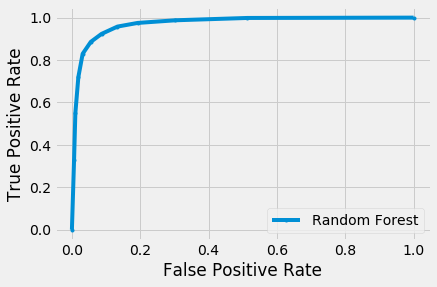

ROC-AUC score:  0.971473705967461


In [125]:
proba = rf.predict_proba(X_test_ano)[:,1]
rf_auc = roc_auc_score(y_test_ano, proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test_ano, proba)
# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print('ROC-AUC score: ',rf_auc)

In [126]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = X_train_ano.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: review_scores_cleanliness Importance: 0.1
Variable: review_scores_accuracy Importance: 0.06
Variable: review_scores_communication Importance: 0.05
Variable: calculated_host_listings_count Importance: 0.04
Variable: summary              Importance: 0.03
Variable: latitude             Importance: 0.03
Variable: longitude            Importance: 0.03
Variable: amenities            Importance: 0.03
Variable: review_scores_checkin Importance: 0.03
Variable: reviews_per_month    Importance: 0.03
Variable: space                Importance: 0.02
Variable: neighborhood_overview Importance: 0.02
Variable: notes                Importance: 0.02
Variable: transit              Importance: 0.02
Variable: access               Importance: 0.02
Variable: interaction          Importance: 0.02
Variable: house_rules          Importance: 0.02
Variable: host_about           Importance: 0.02
Variable: host_verifications   Importance: 0.02
Variable: cleaning_fee         Importance: 0.02
Variable: calen

In [127]:
selected_columns = [name for (name,value) in feature_importances][:10]
selected_importances = [value for (name,value) in feature_importances][:10]

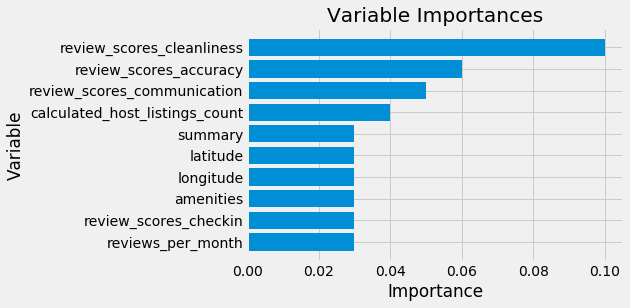

In [128]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
y_values = list(range(len(selected_columns)))
# Make a bar chart
plt.barh(y_values, selected_importances, orientation = 'horizontal')
plt.yticks(y_values, selected_columns, rotation='horizontal')
plt.gca().invert_yaxis()
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

We see a clear improvement in terms of the model performance using the random forest with default parameter values. To strengthen the validity of our findings, we will use cross-validation to tune the max_depth and max_features, and see if the results will remain the same.

In [136]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 50, 100],
    'max_features': [10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10]}

rf1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
proba = best_grid.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, proba)
print('Best roc_auc score before anonymization: ',rf_auc)


Best roc_auc score before anonymization:  0.8627691407744055


In [137]:
param_grid = {
    'max_depth': [10, 50, 100],
    'max_features': [10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10]}

rf2 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train_ano, y_train_ano)
grid_search.best_params_
best_grid = grid_search.best_estimator_
proba = best_grid.predict_proba(X_test_ano)[:,1]
rf_auc = roc_auc_score(y_test_ano, proba)
print('Best roc_auc score after anonymization: ',rf_auc)


Best roc_auc score after anonymization:  0.9720396452790818


After tuning the hyper parameters: max_depth, max_features, and min_samples_split, we see that the dataset anonymization still yields a better performance with the random forest model chosen by the cross validation. Therefore, we feel safe to say that the anonymization procedure indeed helps improve the model performance.

## Results <a id = "6"></a>


Using the same model, we found that the performance of the random forest model improved substantially. To be more specific, the auc-roc score increased from 0.84 to 0.97. This is true even when we tune the hyperparameters of the random forest. We believe that this difference is due to that the dataset before anonymization contains too much noise. And some noise variables are seen as false signals, affecting the model’s performance. To check our intuition, we also draw the variable importance. They are mostly similar, with still some differences. The id column appears in the first plot (before anonymization). Maybe the listings that show up earlier in the Airbnb are generally more popular or the opposite, but we generally believe that this should be irrelevant to the review scores that we are considering. So without anonymization, the random forest may overfit the dataset and mistakenly identify noise columns as signals. 


## Conclusion <a id = "7"></a>

Our project has some limitations as well. As the last step of our anonymization, we added synthetic records. One alternative way is to use other cities' data. However, since the variables that are not quasi-identifiers may also contain geographic related information in this dataset, adding another city's records may destroy the internal structure of our Boston dataset. In the end, we decided not to take this approach. But this is certainly a method to try with some considerations in teh future.

To conclude, anonymization helps protect the host privacy whether it is host relevant or listing relevant, such as the location, and the year when the host joined airbnb. It is compatible for the modeling analysis, as we saw in the above random forest procedure. It removes noise from the dataset, relieves the overfitting problem and can help the model achieve a better performance. Therefore, we suggest that before being published publicly for research use, the Airbnb dataset should go through some anonymization procedure similar to the one we purpose here, since this may not weaken the model performance and can indeed help the model better select important features. More importantly, as we have stressed a lot in this class, this anonymization procedure helps protect users' privacy, which should be paid with more attention by the Big Tech companies such as Airbnb.
